### Контекст проекта
Работу выполнил: Дедков Александр

Краудфандинговая платформа kiva.org ставит своей целью предоставление финансовых услуг наиболее нуждающимся и необеспеченным людям. Заёмщики оставляют заявку на сайте, доноры поддерживают её  финансово, на месте партнёр организации выдаёт кредит, который погашается из этих средств, которые донорам возвращаются уже заёмщиками через платформу.

Представленный компанией датасет за 2014-2017гг. содержит информацию о займах на различные проекты в 85 разных странах.

Проект призван найти взаимосвязи характеристик со скоростью набора средств, мы исследуем, связана ли доля заёмщиков-женщин с основной религией страны. Выделим локальных финансовых партнёров, которые доверяют платформе и выдают кредиты до того, как собраны средства на их возмещение. Проанализируем как зависит сектор заявки от индекса бедности страны и в каких странах Kiva недостаточно представлена.

### Декомпозиция


* Скорость анализа выдачи средств:
  * Рассчитайте время, которое было затрачено на выдачу средств по каждой заявке
  * Проанализируйте распределение времени выдачи средств с помощью описательной статистики и визуализаций, в том числе в разрезе имеющихся в датасете категорий.
  * Определите факторы, которые могут повлиять на скорость выдачи средств, такие как сумма кредита, сектор, деятельность, партнер или страна.
  * Проведите статистический тест, чтобы подтвердить ваши выводы<br><br>

* Анализ заявок и индекса бедности:
  * Аггрегируйте данные по заявкам в разрезе стран, сохраняя информацию о средних и суммарных показателях (необходимо будет определить для характеристик, какой вид аггрегации к ним подходит)
  * Объедините данные индекса бедности по странам с получившимся набором данных Kiva.
  * Проанализируйте взаимосвязь между темой заявки (столбец activity или sector) и индексом бедности страны.
  * Определите сектора и темы заявок, которые более распространены в странах с более высокими индексами бедности.
  * Оцените представленность заявок из бедных стран в наборе кредитных данных Kiva, определите страны, в которых Kiva недопредставлена, на основе частоты выдачи кредитов.<br><br>



### Загрузка данных

In [277]:
!pip install phik --quiet

In [278]:
!pip install googletrans --quiet

In [279]:
# библиотеки
import numpy as np
import pandas as pd
from googletrans import Translator
import matplotlib.pyplot as plt
import seaborn as sns
import phik
from scipy import stats as st
import numpy as np
from sklearn.preprocessing import LabelEncoder
from tqdm.auto import tqdm
from scipy.stats import norm

In [280]:
# сводный индекс бедности
mpi_index = {
 'Afghanistan':0.27172124, 'Albania':0.00274788, 'Algeria':0.0054091, 'Angola':0.28243506, 'Argentina':0.0014693,
 'Armenia':0.000690069007857107, 'Azerbaijan':0.021,'Bangladesh':0.1040603, 'Belize':0.01710883, 'Benin':0.36767483,
 'Bolivia':0.0377543, 'Botswana':0.0726387, 'Burundi':0.408861094240289,
 'Cameroon':0.2320601, 'Central African Republic':0.4613475, 'Chad':0.5170112, 'Chile':0.207, 'Colombia':0.01965727,
 'Congo':0.3311887, 'Costa Rica':0.0020063, 'Cote D\'Ivoire':0.235871,
 'Cuba':0.0026887, 'Dominican Republic':0.0087862, 'Ecuador':0.0079374, 'Ethiopia':0.3666042, 'Gambia':0.1980231,
 'Georgia':0.0012446, 'Ghana':0.1112183, 'Guinea':0.3732216, 'Guinea-Bissau':0.3406887, 'Guyana':0.0065924,
 'Haiti':0.1995877, 'Honduras':0.0511542, 'India':0.0688106, 'Indonesia':0.0140107, 'Iraq':0.03269432,
 'Israel':None,'Jamaica':0.0108103, 'Jordan':0.00152592, 'Kiribati':0.0801574, 'Kyrgyzstan':0.001426,
 'Lao People\'s Democratic Republic':0.10833325, 'Lebanon':0.531,'Lesotho':0.0843592, 'Liberia':0.2592937, 'Madagascar':0.3839745,
 'Malawi':0.2310952, 'Maldives':0.00265409, 'Mali':0.3760629, 'Mauritania':0.3270372, 'Mexico':0.0280538,
 'Mongolia':0.0281268, 'Montenegro':0.0048989, 'Morocco':0.0266967, 'Myanmar (Burma)':0.17584623, 'Nepal':0.0743989,
 'Nigeria':0.2543896, 'North Macedonia':0.0014221, 'Pakistan':0.1982474, 'Palestine':0.0019801, 'Panama':0.191,
 'Papua New Guinea':0.2632909, 'Paraguay':0.01884858, 'Peru':0.0292211, 'Philippines':0.02424934, 'Rwanda':0.231002,
 'Samoa':0.0246005, 'Sao Tome and Principe':0.0479234, 'Senegal':0.262862, 'Serbia':0.0004331, 'Seychelles':0.0029635,
 'Sierra Leone':0.2928993, 'Somalia':0.514,'South Africa':0.02489064, 'Sri Lanka':0.0111847, 'Suriname':0.0112325,
 'Tajikistan':0.02900592, 'Tanzania':0.284179310669258, 'Thailand':0.0021207, 'Timor-Leste':0.221514240070676,
 'Togo':0.1796163, 'Tonga':0.0033362, 'Tunisia':0.0028877, 'Turkmenistan':0.0008492, 'Turkey':0.028,
 'Tuvalu':0.0080846, 'Uganda':0.281028478426768, 'Vietnam':0.0077294, 'Zambia':0.2316851, 'Zimbabwe':0.1099418,
 'Barbados':0.00852886, 'Bhutan':0.17486399, 'Bosnia and Herzegovina':0.0083075, 'Brazil':0.01634604,
 'Burkina Faso':0.523424279357662, 'Cambodia':0.17034812, 'China':0.0160667, 'Comoros':0.18077141,
 'The Democratic Republic of the Congo':0.1116763,
 'Egypt':0.0196817970481763, 'El Salvador':0.03246251, 'Eswatini (Kingdom of)':0.08127132, 'Gabon':0.0696953622816103,
 'Guatemala':0.13351782, 'Kazakhstan':0.00161063266199911, 'Kenya':0.170776074964141, 'Libya':0.00742146512493491,
 'Moldova':0.00353391, 'Mozambique':0.416955412151251, 'Namibia':0.184734534885262,
 'Nicaragua':0.0744948916698962, 'Niger':0.601279812220296, 'Saint Lucia':0.00720186, 'South Sudan':0.58015746,
 'Sudan':0.2794396, 'Trinidad and Tobago':0.00241792, 'Vanuatu':0.129,'Ukraine':0.000840431758839254,
 'Yemen':0.245166461457986 }

def lookup(df:pd.DataFrame) -> None:
    '''Функция для получения базовой информации о датафрейме'''
    print('Dataset shape',df.shape,"example:")
    display(df.dropna().sample().T)
    for col in df.columns:
        n = df[col].nunique()
        if n < 15:
            display(df[col].value_counts(dropna=False).to_frame().T.style.format("{:_.0f}"))
        elif np.issubdtype(df[col].dtype, np.number):
            print(f"{col} — {n} values. Min {df[col].min():_.0f}, avg: {df[col].mean():_.1f}, max: {df[col].max():_.0f}")
        else:
            print(f"{col} — {n} values. Min {df[col].dropna().min()}, max: {df[col].dropna().max()}")

In [323]:
df = pd.read_csv('kiva.zip',low_memory=False)

In [324]:
df.head(2)

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,...,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date,main_country_religion
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,...,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01,Muslims
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,...,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01,Muslims


In [325]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 622633 entries, 0 to 622632
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     622633 non-null  int64  
 1   funded_amount          622633 non-null  float64
 2   loan_amount            622633 non-null  float64
 3   activity               622633 non-null  object 
 4   sector                 622633 non-null  object 
 5   use                    619310 non-null  object 
 6   country_code           622625 non-null  object 
 7   country                622633 non-null  object 
 8   region                 574127 non-null  object 
 9   currency               622633 non-null  object 
 10  partner_id             611522 non-null  float64
 11  posted_time            622633 non-null  object 
 12  disbursed_time         622633 non-null  object 
 13  funded_time            622633 non-null  object 
 14  term_in_months         622633 non-nu

### Очистка и подготовка данных

In [326]:
# проверка на пропуски
def empty_df(df):
    for i in df.columns:
        if df[i].isnull().sum() > 0:
            print('кол-во пропусков в', i, df[i].isnull().sum(), 'процент:', round((df[i].isnull().sum() / len(df)) * 100, 2), end='\t')
            print()
empty_df(df)

кол-во пропусков в use 3323 процент: 0.53	
кол-во пропусков в country_code 8 процент: 0.0	
кол-во пропусков в region 48506 процент: 7.79	
кол-во пропусков в partner_id 11111 процент: 1.78	
кол-во пропусков в tags 167915 процент: 26.97	
кол-во пропусков в borrower_genders 3318 процент: 0.53	


как видно из полученных данных, большой процент пропусков в tags. Далее посмотрим уникальные значения в этом столбце

In [327]:
df['tags'].unique()

array([nan, 'user_favorite, user_favorite', '#Elderly, #Woman Owned Biz',
       ...,
       '#Single Parent, #Animals, #Parent, user_favorite, #Biz Durable Asset, #Woman Owned Biz, user_favorite',
       '#Woman Owned Biz, #Biz Durable Asset, #Repeat Borrower, #Fabrics',
       'volunteer_pick, #Single Parent, #Parent, #Repeat Borrower'],
      dtype=object)

In [328]:
len(df['tags'].unique())

80524

Как видно, данный столбец захламлен тегами, удобство в том, что они хаотично записаны в строчках. Разобьем данные теги и проделаем следующие шаги:
1. найдем кол-во уникальных тегов
2. создадим столбцы на основе данных тегов
3. если тег встречается у пользователя, то дабавим 1, если нет, то 0

In [329]:
df['tags'] = df['tags'].str.lower().str.replace('#', '')
df['tags'].unique()

array([nan, 'user_favorite, user_favorite', 'elderly, woman owned biz',
       ...,
       'single parent, animals, parent, user_favorite, biz durable asset, woman owned biz, user_favorite',
       'woman owned biz, biz durable asset, repeat borrower, fabrics',
       'volunteer_pick, single parent, parent, repeat borrower'],
      dtype=object)

In [330]:
tags_unique = set()
for i in df['tags']:
    for j in str(i).split(','):
        tags_unique.add(j.strip())
len(tags_unique)

36

In [331]:
translator = Translator()

for i in tags_unique:
    print(i, ':', translator.translate(i, src='en', dest='ru').text)

single : одинокий
unique : уникальный
fabrics : ткани
job creator : создатель работы
trees : деревья
refugee : беженец
volunteer_pick : волонтер_выбор
health and sanitation : здоровье и санитария
parent : родитель
technology : технологии
female education : женское образование
repair renew replace : ремонт возобновить заменить
user_like : user_like
post-disbursed : после выплаты
woman owned biz : бизнес, принадлежащий женщине
single parent : Одинокий родитель
widowed : овдовел
supporting family : поддержка семьи
animals : животные
orphan : сирота
eco-friendly : экологически чистый
schooling : учеба в школе
volunteer_like : волонтер_лайк
tourism : туризм
user_favorite : user_favorite
biz durable asset : долгосрочный актив бизнеса
interesting photo : интересное фото
inspiring story : вдохновляющая история
repeat borrower : повторный заемщик
first loan : первый кредит
low-profit fp : малоприбыльный фп
nan : нан
elderly : пожилой
hidden gem : скрытая жемчужина
vegan : веган
sustainable ag :

Вывод: как видно тут содержаться различные метки оставленные при внесении данных. На данный момент не будем заполнять пропуски.

In [332]:
for i in df.columns:
    print(i, ':', translator.translate(i.replace('_', ' '), src='en', dest='ru').text)

id : идентификатор
funded_amount : сумма финансирования
loan_amount : величина займа
activity : активность
sector : сектор
use : использовать
country_code : код страны
country : страна
region : область
currency : валюта
partner_id : идентификационный номер партнера
posted_time : опубликованное время
disbursed_time : потраченное время
funded_time : финансируемое время
term_in_months : срок в месяцах
lender_count : количество кредиторов
tags : теги
borrower_genders : пол заемщика
repayment_interval : интервал погашения
date : дата
main_country_religion : основная религия страны


Привидем столбцы в posted_time, disbursed_time, funded_time в datetime

In [333]:
df['posted_time'] = pd.to_datetime(df['posted_time'])
df['disbursed_time'] = pd.to_datetime(df['disbursed_time'])
df['funded_time'] = pd.to_datetime(df['funded_time'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 622633 entries, 0 to 622632
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype              
---  ------                 --------------   -----              
 0   id                     622633 non-null  int64              
 1   funded_amount          622633 non-null  float64            
 2   loan_amount            622633 non-null  float64            
 3   activity               622633 non-null  object             
 4   sector                 622633 non-null  object             
 5   use                    619310 non-null  object             
 6   country_code           622625 non-null  object             
 7   country                622633 non-null  object             
 8   region                 574127 non-null  object             
 9   currency               622633 non-null  object             
 10  partner_id             611522 non-null  float64            
 11  posted_time            622633 non-null 

Проверим на дубликаты:

In [334]:
df.duplicated().sum()

0

Вывод: полных дубликатов нет.

Проверим данные на выбрасы и уберм их

col: funded_amount, lenght: 622633
funded_amount IQR: 650.0
границы выбрасов: верхняя - (1875.0), нижняя - (-725.0)
выбрасы: 0.08534401485305147 

----------

col: loan_amount, lenght: 622633
loan_amount IQR: 650.0
границы выбрасов: верхняя - (1875.0), нижняя - (-725.0)
выбрасы: 0.08534401485305147 

----------

col: term_in_months, lenght: 622633
term_in_months IQR: 6.0
границы выбрасов: верхняя - (23.0), нижняя - (-1.0)
выбрасы: 0.08894967019094716 

----------

col: lender_count, lenght: 622633
lender_count IQR: 18.0
границы выбрасов: верхняя - (52.0), нижняя - (-20.0)
выбрасы: 0.07811664335170157 

----------



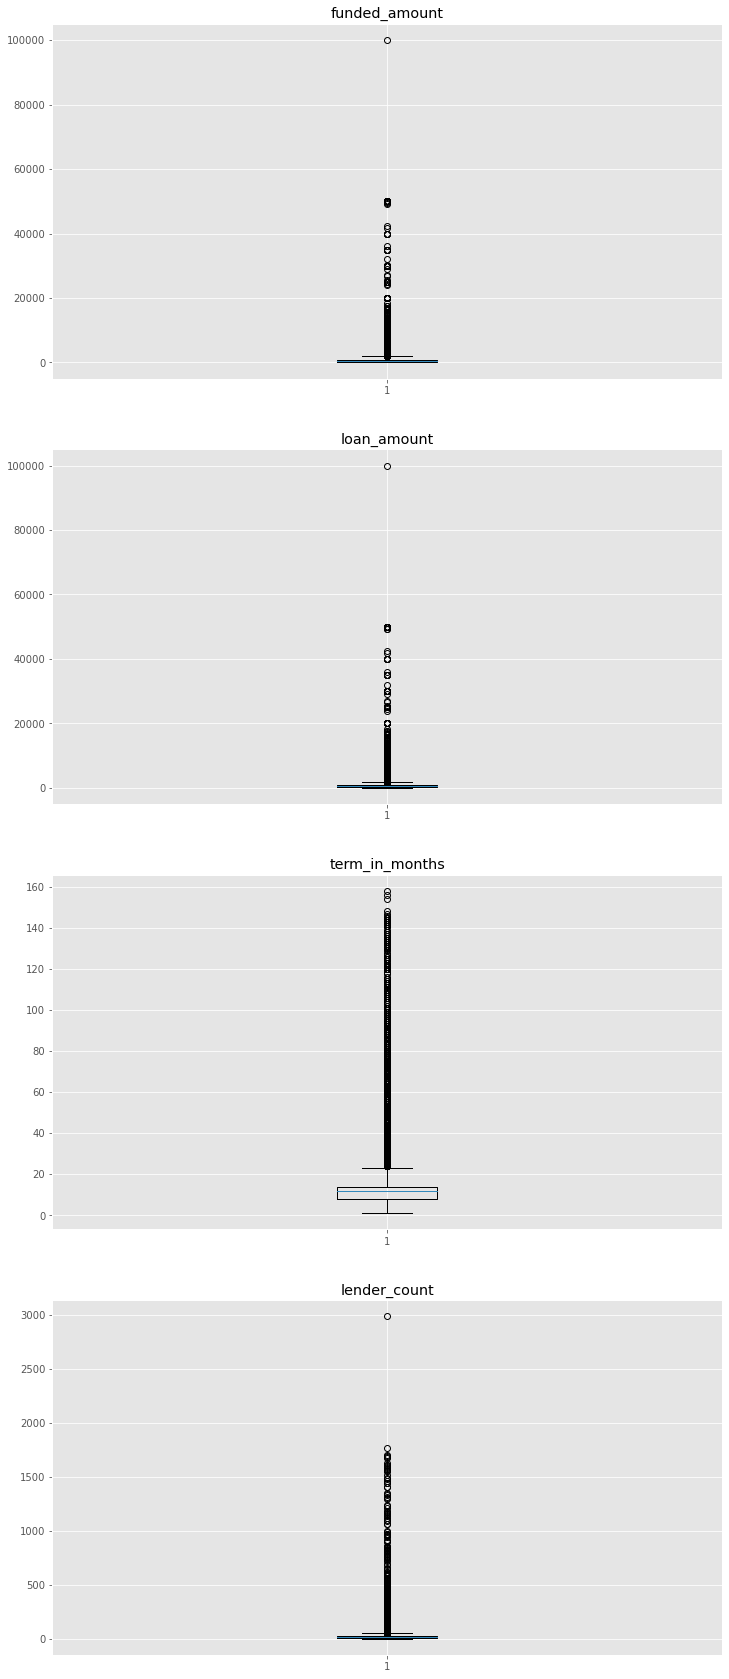

In [335]:
col = ['funded_amount', 'loan_amount', 'term_in_months', 'lender_count']
fig = plt.figure(figsize=(12, 30))
df_old = df.copy()
df_new = df.copy()
for j in range(len(col)):
    t1 = df[col[j]]
    print(f'col: {col[j]}, lenght: {len(t1)}')
    pylab.subplot(len(col), 1, j + 1)
    pylab.boxplot(t1)
    pylab.title(col[j])
    
    Q1 = np.percentile(df[col[j]], 25)
    Q3 = np.percentile(df[col[j]], 75)
    IQR = Q3 - Q1
    print(f'{col[j]} IQR: {IQR}')
    upper = Q3 + 1.5 * IQR
    lower = Q1 - 1.5 * IQR
    print(f'границы выбрасов: верхняя - ({upper}), нижняя - ({lower})')


    print(f'выбрасы: {(len(df_new[df_new[col[j]] >= upper]) + len(df_new[df_new[col[j]] <= lower]))/len(df_old)} ')
    print()
    print('-' * 10)
    print()

Разделим страны на три группы ('https://nonews.co/directory/lists/countries/advanced-developing-market'):
- Developed countries (Развитые страны)
- Developing countries (Развивающиеся страны)
- Undeveloped countries (не развитые страны)

In [336]:
dev_hum = pd.read_html('https://nonews.co/directory/lists/countries/advanced-developing-market')
Developed_countries = dev_hum[0]
Developing_countries = dev_hum[1]
Undeveloped_countries = dev_hum[2]

In [337]:
def tr_country(rol):
    if translator.translate(rol, src='ru', dest='en').text:
        return translator.translate(rol, src='ru', dest='en').text
    else:
        return 'NA'

Developed_countries['en'] = Developed_countries['Страна'].apply(tr_country)
Developing_countries['en'] = Developing_countries['Страна'].apply(tr_country)
Undeveloped_countries['en'] = Undeveloped_countries['Страна'].apply(tr_country)
Undeveloped_countries.head()

,№,Страна,en
0,1,Афганистан,Afghanistan
1,2,Ангола,Angola
2,3,Бангладеш,Bangladesh
3,4,Бенин,Benin
4,5,Бутан,Butane


In [338]:
def group_country(rol):
    if rol in Developed_countries['en'].tolist():
        return 'Developed_countries'
    if rol in Developing_countries['en'].tolist():
        return 'Developing_countries'
    if rol in Undeveloped_countries['en'].tolist():
        return 'Undeveloped_countries'
    return 'NA'
df['group_country'] = df['country'].apply(group_country)
df.groupby('group_country')['country'].count()

group_country
Developed_countries         241
Developing_countries     454435
NA                        61537
Undeveloped_countries    106420
Name: country, dtype: int64

In [339]:
df[df['group_country'] == 'NA'].groupby('country')['country'].count()

country
Bhutan                                      1
Cote D'Ivoire                               1
El Salvador                             32723
Lao People's Democratic Republic         1483
Lebanon                                  8094
Myanmar (Burma)                          1565
Saint Vincent and the Grenadines           16
Samoa                                    6684
The Democratic Republic of the Congo     2942
Timor-Leste                              2458
Turkey                                   1702
United States                            3864
Vanuatu                                     4
Name: country, dtype: int64

In [340]:
def contry(cnt):
    if cnt['group_country'] == 'NA':
        if cnt['country'] in ['Bhutan', "Lao People's Democratic Republic", 'Lebanon', 'Myanmar (Burma)',
                   'Saint Vincent and the Grenadines', 'Timor-Leste', 'Vanuatu', 'Samoa']:
            return 'Undeveloped_countries'
        if cnt['country'] in ["Cote D'Ivoire", 'El Salvador', 'The Democratic Republic of the Congo']:
            return 'Developing_countries'
        if cnt['country'] in ['United States', 'Turkey']:
            return 'Developed_countries'
    return cnt['group_country']
df['group_country'] = df.apply(contry, axis=1)

In [341]:
df_gr = df.groupby('group_country')['country'].agg(['count'])

<AxesSubplot:title={'center':'разбивка стран по группам'}, xlabel='group_country'>

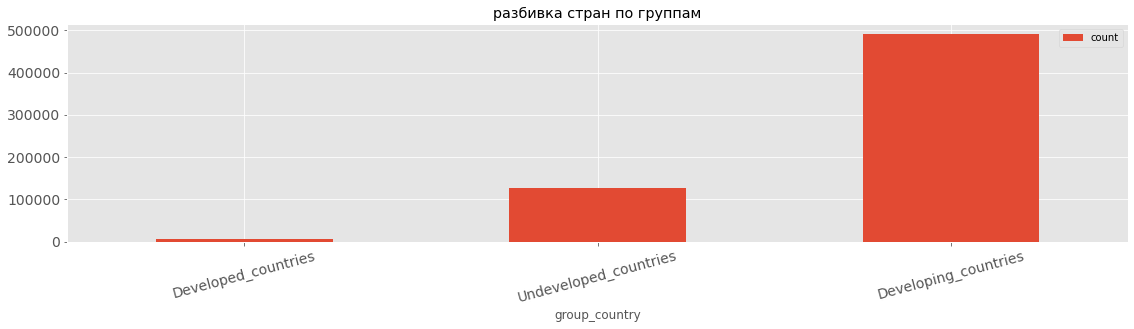

In [342]:
df_gr.reset_index().sort_values(by='count', ascending=True).plot(
    x="group_country",
    y="count",
    kind="bar",
    rot=15,
    fontsize=14,
    figsize=(19,4),
    title='разбивка стран по группам'
)

In [343]:
col = ['funded_amount', 'loan_amount', 'term_in_months', 'lender_count']
fig = plt.figure(figsize=(12, 30))
df_old = df.copy()
df_new = df.copy()
for i in ['Undeveloped_countries', 'Developing_countries', 'Developed_countries']:
    df_n = df_new[df_new['group_country'] == i]
    print(i)
    print('_' * 20)
    for j in range(len(col)):
        t1 = df_n[col[j]]
        print(f'col: {col[j]}, lenght: {len(t1)}')

        Q1 = np.percentile(df[col[j]], 25)
        Q3 = np.percentile(df[col[j]], 75)
        IQR = Q3 - Q1
        print(f'{col[j]} IQR: {IQR}')
        upper = Q3 + 1.5 * IQR
        lower = Q1 - 1.5 * IQR
        print(f'границы выбрасов: верхняя - ({upper}), нижняя - ({lower})')


        print(f'выбрасы: {(len(t1[df_n[col[j]] >= upper]) + len(df_n[df_n[col[j]] <= lower]))/len(t1)} ')

        print()
        print('-' * 10)
        print()

Undeveloped_countries
____________________
col: funded_amount, lenght: 126725
funded_amount IQR: 650.0
границы выбрасов: верхняя - (1875.0), нижняя - (-725.0)
выбрасы: 0.1015506016965871 

----------

col: loan_amount, lenght: 126725
loan_amount IQR: 650.0
границы выбрасов: верхняя - (1875.0), нижняя - (-725.0)
выбрасы: 0.1015506016965871 

----------

col: term_in_months, lenght: 126725
term_in_months IQR: 6.0
границы выбрасов: верхняя - (23.0), нижняя - (-1.0)
выбрасы: 0.05570329453541133 

----------

col: lender_count, lenght: 126725
lender_count IQR: 18.0
границы выбрасов: верхняя - (52.0), нижняя - (-20.0)
выбрасы: 0.1041388834089564 

----------

Developing_countries
____________________
col: funded_amount, lenght: 490101
funded_amount IQR: 650.0
границы выбрасов: верхняя - (1875.0), нижняя - (-725.0)
выбрасы: 0.07452749535299867 

----------

col: loan_amount, lenght: 490101
loan_amount IQR: 650.0
границы выбрасов: верхняя - (1875.0), нижняя - (-725.0)
выбрасы: 0.07452749535299

<Figure size 864x2160 with 0 Axes>

Из полученных данных видим, что выбрасы для 'Undeveloped_countries', 'Developing_countries' не превышают 10%, в тоже время для 'Developed_countries' выбрасы составляют больше 60%. Поэтому было решено удалить выбрасы только в группах: 'Undeveloped_countries', 'Developing_countries'

In [350]:
col = ['funded_amount', 'loan_amount', 'term_in_months', 'lender_count']
fig = plt.figure(figsize=(12, 30))
df_old = df.copy()
df_new = df.copy()

upper_array = set()
lower_array = set()

for i in ['Undeveloped_countries', 'Developing_countries']:
    df_n = df_new[df_new['group_country'] == i]
    for j in range(len(col)):
        t1 = df_n[col[j]]

        Q1 = np.percentile(df[col[j]], 25)
        Q3 = np.percentile(df[col[j]], 75)
        IQR = Q3 - Q1
        print(f'{col[j]} IQR: {IQR}')
        upper = Q3 + 1.5 * IQR
        lower = Q1 - 1.5 * IQR
        print(f'границы выбрасов: верхняя - ({upper}), нижняя - ({lower})')

        for i in np.where((df_new[col[j]] >= upper) & (df_new['group_country'] != 'Developed_countries'))[0]:
            upper_array.add(i)
        for i in np.where((df_new[col[j]] <= lower) & (df_new['group_country'] != 'Developed_countries'))[0]:
            lower_array.add(i)

        
        print()
        print('-' * 10)
        print()
df_new.drop(index=upper_array, inplace=True)
df_new.drop(index=lower_array, inplace=True)
print(f'df_old: {len(df_old)}, df_new: {len(df_new)} удалено всего: {1 - (len(df_new)/len(df_old))} ')

funded_amount IQR: 650.0
границы выбрасов: верхняя - (1875.0), нижняя - (-725.0)

----------

loan_amount IQR: 650.0
границы выбрасов: верхняя - (1875.0), нижняя - (-725.0)

----------

term_in_months IQR: 6.0
границы выбрасов: верхняя - (23.0), нижняя - (-1.0)

----------

lender_count IQR: 18.0
границы выбрасов: верхняя - (52.0), нижняя - (-20.0)

----------

funded_amount IQR: 650.0
границы выбрасов: верхняя - (1875.0), нижняя - (-725.0)

----------

loan_amount IQR: 650.0
границы выбрасов: верхняя - (1875.0), нижняя - (-725.0)

----------

term_in_months IQR: 6.0
границы выбрасов: верхняя - (23.0), нижняя - (-1.0)

----------

lender_count IQR: 18.0
границы выбрасов: верхняя - (52.0), нижняя - (-20.0)

----------

df_old: 622633, df_new: 523757 удалено всего: 0.15880301879277203 


<Figure size 864x2160 with 0 Axes>

col: funded_amount, lenght: 523757
col: loan_amount, lenght: 523757
col: term_in_months, lenght: 523757
col: lender_count, lenght: 523757


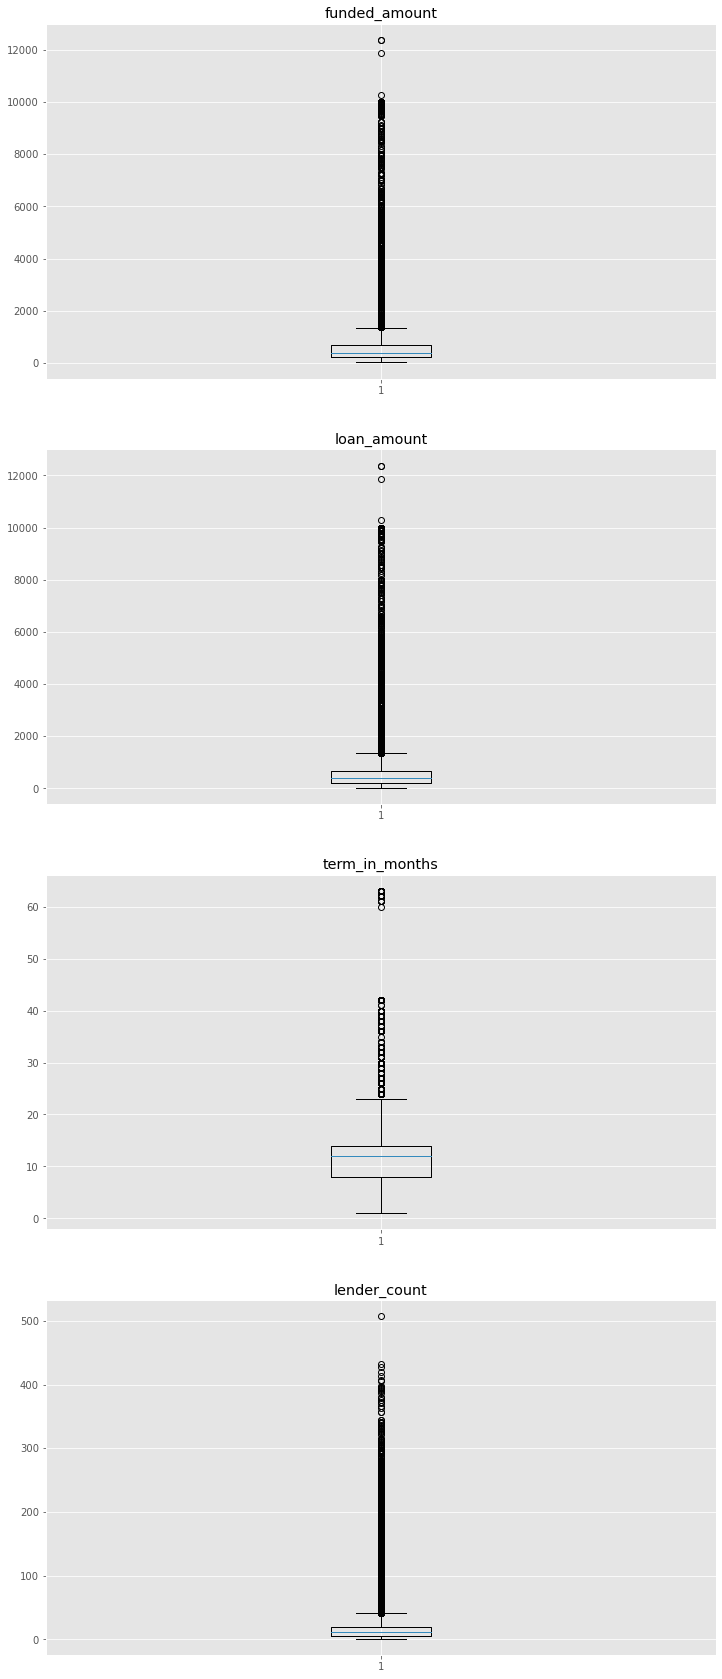

In [351]:
col = ['funded_amount', 'loan_amount', 'term_in_months', 'lender_count']
fig = plt.figure(figsize=(12, 30))

for j in range(len(col)):
    t1 = df_new[col[j]]
    print(f'col: {col[j]}, lenght: {len(t1)}')
    pylab.subplot(len(col), 1, j + 1)
    pylab.boxplot(t1)
    pylab.title(col[j])

вывод: из данных были удалены строчки с выбрасами в с толбцах 'funded_amount', 'loan_amount', 'term_in_months', 'lender_count', кроме строчек из группы: Developed_countries.
Всего удалено данных 16%

### Скорость анализа выдачи средств

In [352]:
df = df_new.copy()

#### Рассчитайте время, которое уходит на выделение средств партнером заемщику по каждой заявке

In [353]:
df['fundraising_time'] = df['posted_time'] - df['disbursed_time']

#### Проанализируйте распределение времени выделения средств партнером заемщику с помощью описательной статистики и визуализаций, в том числе в разрезе имеющихся в датасете категорий.

<AxesSubplot:title={'center':'время выделения средств'}, ylabel='Frequency'>

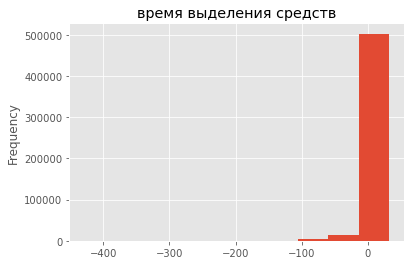

In [354]:
df['fundraising_time_days'] = df['fundraising_time'].dt.days
df['fundraising_time_days'].plot(kind='hist', title='время выделения средств')

In [355]:
df['fundraising_time_days'].describe()

count    523757.000000
mean         13.516215
std          18.766790
min        -428.000000
25%           7.000000
50%          16.000000
75%          26.000000
max          32.000000
Name: fundraising_time_days, dtype: float64

<AxesSubplot:title={'center':'время выделения средств'}, ylabel='Frequency'>

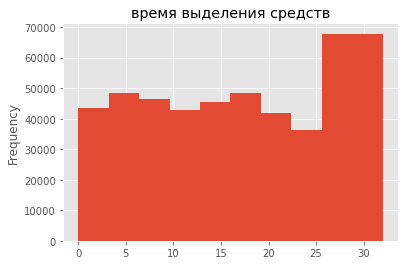

In [356]:
df[df['fundraising_time_days'] >= 0]['fundraising_time_days'].plot(kind='hist', title='время выделения средств')

In [357]:
print(len(df[df['fundraising_time_days'] < 0]['fundraising_time_days']) / len(df['fundraising_time_days']))

0.06656331084835143


Вывод: данные меньше 0 составляют 6%, было решено их убрать и посмотреть сколько именно проходит сам процесс выдачи средств. По общем данным видно, что:
- что длительность выделения средств партнером заемщику составляет в течении 30 дней
- в большинстве случаев выделения средств партнером заемщику завершаентся в промежутке 25 - 30 дней
- на графике видно что есть небольшие две группы по длительности выделения средств: в районе 5 дней и 15 дней

In [358]:
df.groupby('group_country')['fundraising_time_days'].agg(['mean', 'count'])

,mean,count
group_country,,
Developed_countries,-16.114000,5807
Developing_countries,13.490438,413049
Undeveloped_countries,15.257948,104901


In [359]:
df[df['fundraising_time_days'] >= 0].groupby('group_country')['fundraising_time_days'].agg(['mean', 'count'])

,mean,count
group_country,,
Developed_countries,23.088906,2632
Developing_countries,16.987636,384107
Undeveloped_countries,16.283657,102155


Вывод: из данных видно, что выделения средств партнером заемщику для проектов из развитых стран дольше, но стоит учитывать, что здесь очень много отрицательных значений и данный факт возник из-за того что для заемщиков из развитых стран готовы даннать деньги еще до того, как найдут полную сумму займа у кредиторов.

In [360]:
df_cnt = df.groupby('country')['fundraising_time_days'].agg(['median', 'count']).reset_index(
).sort_values(by='median')
df_cnt.head()

,country,median,count
3,Belize,-90.0,23
61,South Africa,-90.0,103
60,Somalia,-58.0,33
66,Thailand,-49.0,46
53,Puerto Rico,-41.0,51


In [361]:
df_cnt.tail()

,country,median,count
4,Benin,28.0,434
54,Rwanda,28.0,2788
12,Colombia,28.0,14714
50,Paraguay,31.0,4971
31,Kyrgyzstan,31.0,3458


<AxesSubplot:title={'center':'время выделения средств по странам'}, xlabel='country'>

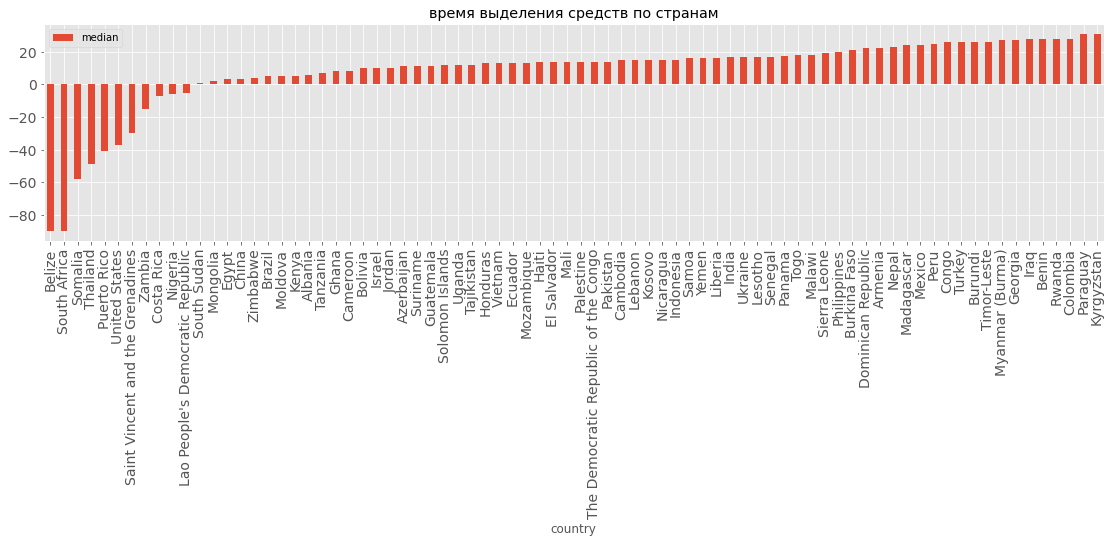

In [362]:
df_cnt.sort_values(by='median', ascending=True).plot(
    x="country",
    y="median",
    kind="bar",
    rot=90,
    fontsize=14,
    figsize=(19,4),
    title='время выделения средств по странам'
)

<AxesSubplot:title={'center':'время выделения средств по странам'}, xlabel='country'>

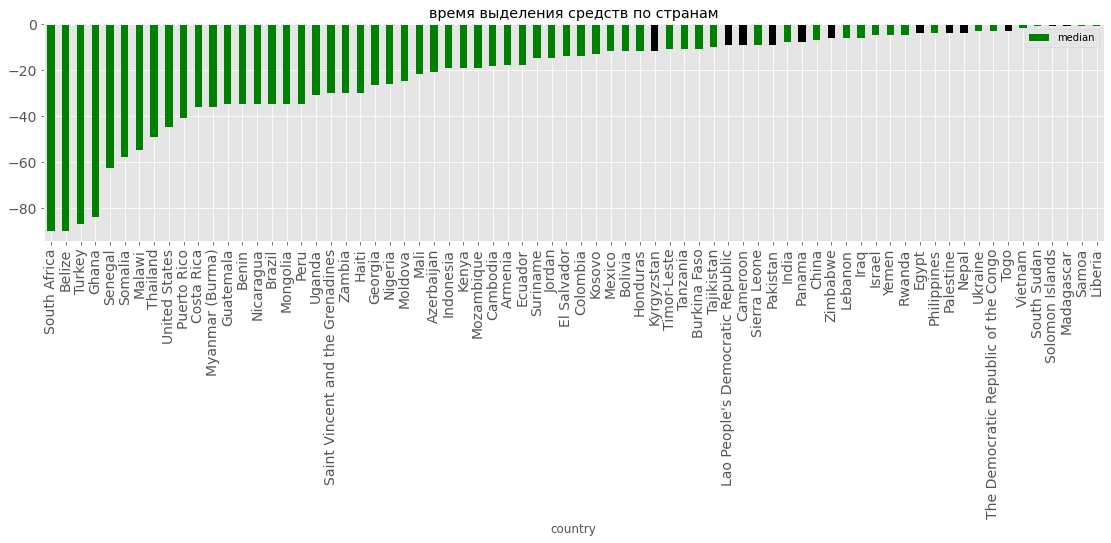

In [363]:
colours = {
    'Developed_countries': "red",
    "Developing_countries": "green",
    'Undeveloped_countries': 'black'
}

df[df['fundraising_time_days'] < 0].groupby(['country', 'group_country'])['fundraising_time_days'].agg(['median', 'count']).reset_index(
).sort_values(by='median').sort_values(by='median', ascending=True).plot(
    x="country",
    y="median",
    kind="bar",
    rot=90,
    fontsize=14,
    figsize=(19,4),
    color=df['group_country'].replace(colours),
    title='время выделения средств по странам'
)

<AxesSubplot:title={'center':'время выделения средств по странам'}, xlabel='country_code'>

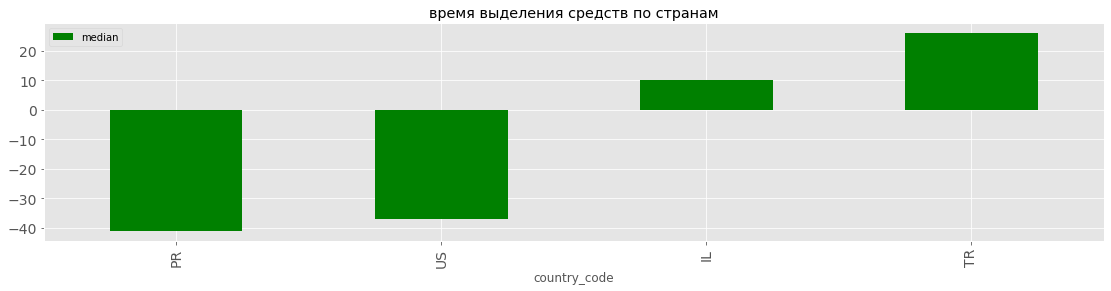

In [364]:
colours = {
    'Developed_countries': "red",
    "Developing_countries": "green",
    'Undeveloped_countries': 'black'
}

df[df['group_country'] == 'Developed_countries'].groupby(['country_code', 'group_country'])['fundraising_time_days'].agg(['median', 'count']).reset_index(
).sort_values(by='median').sort_values(by='median', ascending=True).plot(
    x="country_code",
    y="median",
    kind="bar",
    rot=90,
    fontsize=14,
    figsize=(19,4),
    color=df['group_country'].replace(colours),
    title='время выделения средств по странам'
)

Вывод: проанализировав срез с отризательным временем, на графике видно, что в основном страны для которых дают быстро займы относятся к развитым странам (проекты из данных стран получают еще до полного сбора средств), на втором развивающиеся и долше всего это не развитые страны.

Разделим временные промежутки выдачи средств на 4 группы:

In [365]:
pd.qcut(df['fundraising_time_days'], q=4, labels=['< 7 days', '7 - 16 days', '16 - 26 days', '26 - 32 days']).unique()

['7 - 16 days', '< 7 days', '16 - 26 days', '26 - 32 days']
Categories (4, object): ['< 7 days' < '7 - 16 days' < '16 - 26 days' < '26 - 32 days']

In [366]:
df['fundraising_time_days_group'] = pd.qcut(df['fundraising_time_days'], q=4)

In [367]:
df_time = df.groupby(['group_country', 'fundraising_time_days_group'])['id'].agg(['count'])
df_time

count
group_country         fundraising_time_days_group        
Developed_countries   (-428.001, 7.0]                3330
                      (7.0, 16.0]                     348
                      (16.0, 26.0]                    842
                      (26.0, 32.0]                   1287
Developing_countries  (-428.001, 7.0]              116978
                      (7.0, 16.0]                   95785
                      (16.0, 26.0]                 105642
                      (26.0, 32.0]                  94644
Undeveloped_countries (-428.001, 7.0]               25607
                      (7.0, 16.0]                   30605
                      (16.0, 26.0]                  27035
                      (26.0, 32.0]                  21654

In [368]:
df_time = df_time.reset_index()
df_time['d_t'] = df_time['count'] / df_time['count'].sum()
df_time

,group_country,fundraising_time_days_group,count,d_t
0,Developed_countries,"(-428.001, 7.0]",3330,0.006358
1,Developed_countries,"(7.0, 16.0]",348,0.000664
2,Developed_countries,"(16.0, 26.0]",842,0.001608
3,Developed_countries,"(26.0, 32.0]",1287,0.002457
4,Developing_countries,"(-428.001, 7.0]",116978,0.223344
5,Developing_countries,"(7.0, 16.0]",95785,0.182881
6,Developing_countries,"(16.0, 26.0]",105642,0.201700
7,Developing_countries,"(26.0, 32.0]",94644,0.180702
8,Undeveloped_countries,"(-428.001, 7.0]",25607,0.048891
9,Undeveloped_countries,"(7.0, 16.0]",30605,0.058434


In [369]:
df_time['%'] = 100 * df_time['count'] / df_time.groupby(['group_country'])['count'].transform('sum')

def colors(line):
    if line['group_country'] == 'Developed_countries':
        return ['background-color: yellow'] * 5
    if line['group_country'] == 'Developing_countries':
        return ['background-color: red'] * 5
    if line['group_country'] == 'Undeveloped_countries':
        return ['background-color: green'] * 5
df_time.style.apply(colors, axis=1)

,group_country,fundraising_time_days_group,count,d_t,%
0,Developed_countries,"(-428.001, 7.0]",3330,0.006358,57.344584
1,Developed_countries,"(7.0, 16.0]",348,0.000664,5.992767
2,Developed_countries,"(16.0, 26.0]",842,0.001608,14.499742
3,Developed_countries,"(26.0, 32.0]",1287,0.002457,22.162907
4,Developing_countries,"(-428.001, 7.0]",116978,0.223344,28.320611
5,Developing_countries,"(7.0, 16.0]",95785,0.182881,23.189743
6,Developing_countries,"(16.0, 26.0]",105642,0.201700,25.576142
7,Developing_countries,"(26.0, 32.0]",94644,0.180702,22.913504
8,Undeveloped_countries,"(-428.001, 7.0]",25607,0.048891,24.410635
9,Undeveloped_countries,"(7.0, 16.0]",30605,0.058434,29.175127


In [370]:
f'Проверка: {df_time["%"].sum()}'

'Проверка: 300.0'

Вывод: проанализировав срез с отризательным временем, на графике видно, что в основном страны для которых дают быстро займы относятся к развивающимся странам (проекты из данных стран получают еще до полного сбора средств), на втором не развитые и развитые страны, но это если смотреть на объем от общего числа заявок.
Если рассмотреть временные диапазоны по группам, то можно сделать выводы:
- чаще всего дают быстрые займы заемщикам из развитых стран, чем другие, но стоит учитывать это в разрезе групы стран. На фоне всех стран % займов из развивающихся стран довольно мал.
- клиентом из развивающихся стран видно небольшое смещение в более быстрые займы, по остальным временныи группам довольно ровно
- клиентам из не развитых стран выдают средства часто в диапазоне 7-16 дней, выдача больше 26 дней происходит реже.

In [371]:
df_sector = df.groupby(['sector', 'fundraising_time_days_group'])['id'].agg(['count'])
df_sector

count
sector         fundraising_time_days_group       
Agriculture    (-428.001, 7.0]              42990
               (7.0, 16.0]                  29829
               (16.0, 26.0]                 33173
               (26.0, 32.0]                 33940
Arts           (-428.001, 7.0]               2372
               (7.0, 16.0]                   2226
               (16.0, 26.0]                  2801
               (26.0, 32.0]                  2333
Clothing       (-428.001, 7.0]               8355
               (7.0, 16.0]                   5945
               (16.0, 26.0]                  5682
               (26.0, 32.0]                  4272
Construction   (-428.001, 7.0]               1255
               (7.0, 16.0]                   1048
               (16.0, 26.0]                  1125
               (26.0, 32.0]                  1185
Education      (-428.001, 7.0]               5339
               (7.0, 16.0]                   4052
               (16.0, 26.0]                  4225
               (26.0, 32.0]                  7263
Entertainment  (-428.001, 7.0]                180
               (7.0, 16.0]                    145
               (16.0, 26.0]                   140
               (26.0, 32.0]                   129
Food           (-428.001, 7.0]              28009
               (7.0, 16.0]                  27960
               (16.0, 26.0]                 31562
               (26.0, 32.0]                 23904
Health         (-428.001, 7.0]               1425
               (7.0, 16.0]                   1083
               (16.0, 26.0]                  1643
               (26.0, 32.0]                  2289
Housing        (-428.001, 7.0]               4883
               (7.0, 16.0]                   5244
               (16.0, 26.0]                  5373
               (26.0, 32.0]                  5300
Manufacturing  (-428.001, 7.0]               1187
               (7.0, 16.0]                   1432
               (16.0, 26.0]                  1358
               (26.0, 32.0]                  1063
Personal Use   (-428.001, 7.0]              11957
               (7.0, 16.0]                  10357
               (16.0, 26.0]                  5491
               (26.0, 32.0]                  2684
Retail         (-428.001, 7.0]              23068
               (7.0, 16.0]                  26297
               (16.0, 26.0]                 30203
               (26.0, 32.0]                 23603
Services       (-428.001, 7.0]              11153
               (7.0, 16.0]                   7578
               (16.0, 26.0]                  7687
               (26.0, 32.0]                  7154
Transportation (-428.001, 7.0]               3606
               (7.0, 16.0]                   3413
               (16.0, 26.0]                  2976
               (26.0, 32.0]                  2379
Wholesale      (-428.001, 7.0]                136
               (7.0, 16.0]                    129
               (16.0, 26.0]                    80
               (26.0, 32.0]                    87

In [372]:
df_sector = df.groupby('sector')['id'].agg(['count']).sort_values(by='count').reset_index()
df_sector

,sector,count
0,Wholesale,432
1,Entertainment,594
2,Construction,4613
3,Manufacturing,5040
4,Health,6440
5,Arts,9732
6,Transportation,12374
7,Housing,20800
8,Education,20879
9,Clothing,24254


<AxesSubplot:title={'center':'кол-во заявок по секторам'}, xlabel='sector'>

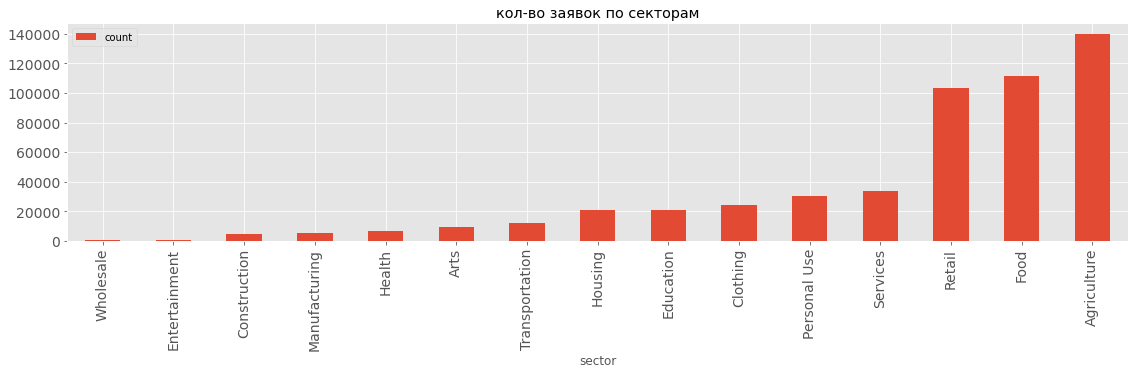

In [373]:
df_sector.sort_values(by='count', ascending=True).plot(
    x="sector",
    y="count",
    kind="bar",
    rot=90,
    fontsize=14,
    figsize=(19,4),
    title='кол-во заявок по секторам'
)

Вывод: с точки зрения секторов, то самые популярные сектора с заявками Retail, Food, Agriculture. Самые не популярные wholesale и Entartainment.

Рассмотрим сектора Retail, Food, Agriculture подробнее:

----------
Retail
                             count
fundraising_time_days_group       
(-428.001, 7.0]              23068
(7.0, 16.0]                  26297
(16.0, 26.0]                 30203
(26.0, 32.0]                 23603
----------
Food
                             count
fundraising_time_days_group       
(-428.001, 7.0]              28009
(7.0, 16.0]                  27960
(16.0, 26.0]                 31562
(26.0, 32.0]                 23904
----------
Agriculture
                             count
fundraising_time_days_group       
(-428.001, 7.0]              42990
(7.0, 16.0]                  29829
(16.0, 26.0]                 33173
(26.0, 32.0]                 33940


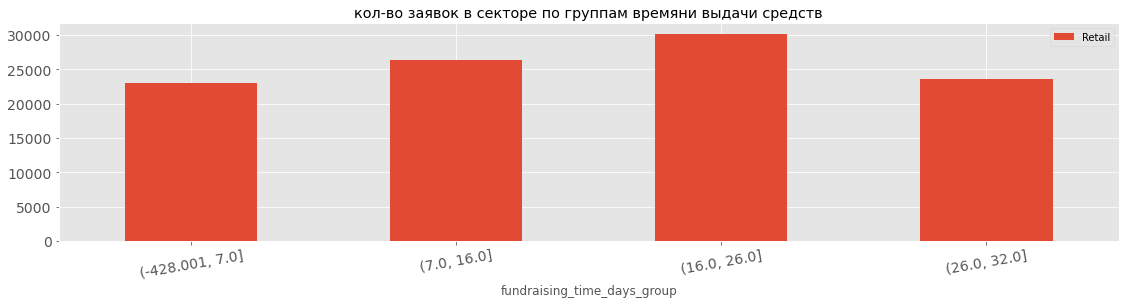

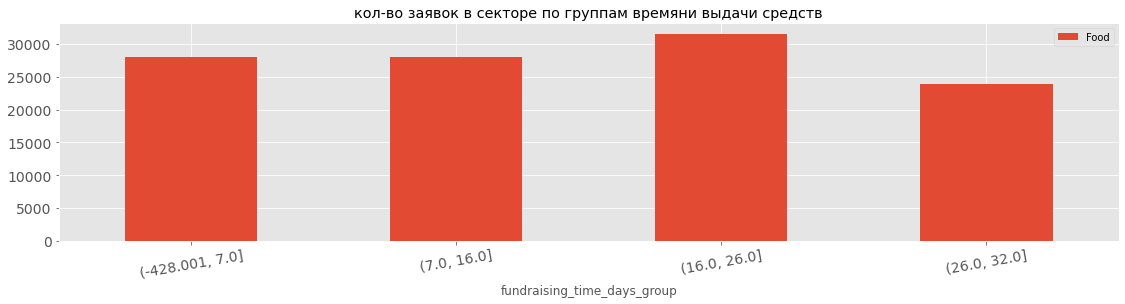

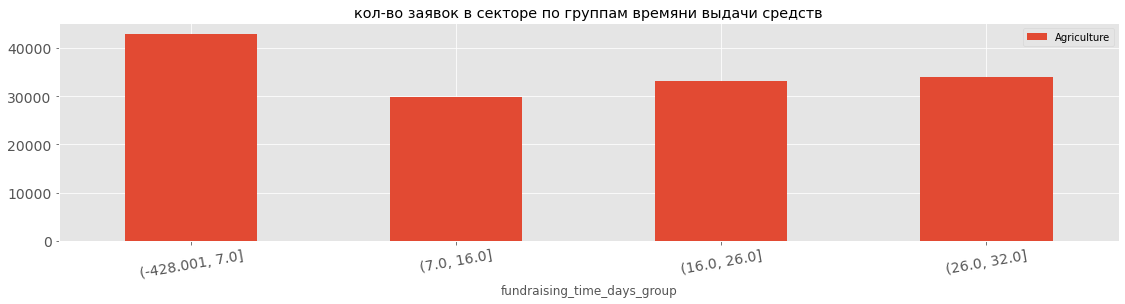

In [374]:
for txt_sector in ['Retail', 'Food', 'Agriculture']:
    print('-' * 10)
    print(txt_sector)
    print(df[df['sector'] == txt_sector].groupby(['fundraising_time_days_group'])['id'].agg(['count']))
    df[df['sector'] == txt_sector].groupby(['fundraising_time_days_group'])['id'].agg(['count']).reset_index().plot(
        x="fundraising_time_days_group",
        y="count",
        kind="bar",
        label=txt_sector,
        rot=10,
        fontsize=14,
        figsize=(19,4),
        title='кол-во заявок в секторе по группам времяни выдачи средств'
)

Вывод: на основе полученных данных можно сделать следующие выводы:
- в Retail и Food чаще всего выдают займы в период 16-26 дней
- в Agriculture чаще всего дает деньги быстрее, чем соберут полностью нуждающийся займ

#### Определите факторы, которые могут повлиять на скорость выдачи средств, такие как сумма кредита, сектор, деятельность, партнер или страна.

Влияние суммы кредита на выдачу средств

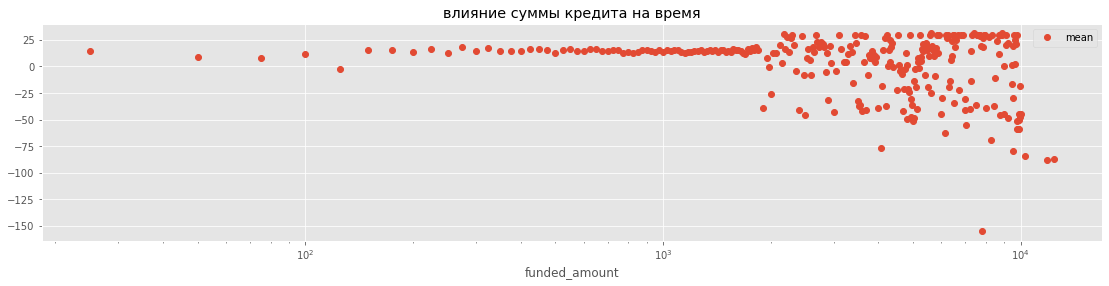

In [375]:
df.groupby(['funded_amount'])['fundraising_time_days'].agg(['mean']).plot(figsize=(19,4), title='влияние суммы кредита на время', style='o', logx=True);

In [376]:
df['funded_amount'].describe()

count    523757.000000
mean        533.944224
std         605.996160
min          25.000000
25%         225.000000
50%         400.000000
75%         675.000000
max       12375.000000
Name: funded_amount, dtype: float64

<AxesSubplot:title={'center':'влияние суммы кредита на время'}, xlabel='funded_amount'>

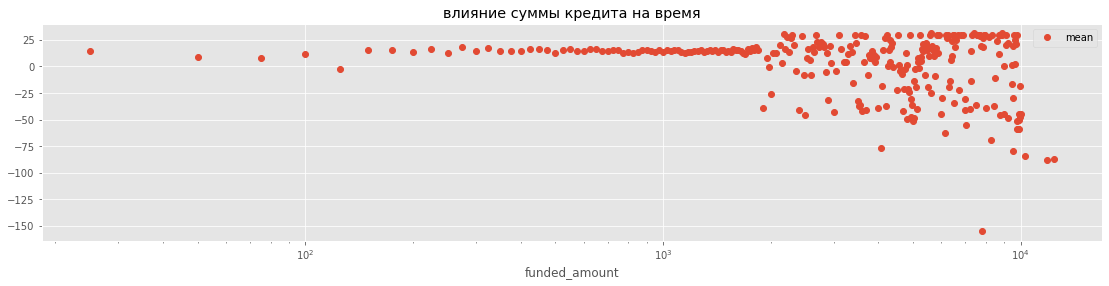

In [377]:
df[df['funded_amount'] < 20000].groupby(['funded_amount'])['fundraising_time_days'].agg(['mean']).plot(figsize=(19,4), title='влияние суммы кредита на время', style='o', logx=True)

Вывод: как видно из полученных данных, большинство займов до 20тыс. Быстрые займы (до сбора средств) выдют на суммы свыше 10тыс. Сбор средств в основном уходит до 20 дней. Видна тенденция к тому что большие займы выдают еще до начала сбора средств.

Влияние сектора на сбор средств

<AxesSubplot:title={'center':'влияние сектора на время'}, xlabel='sector'>

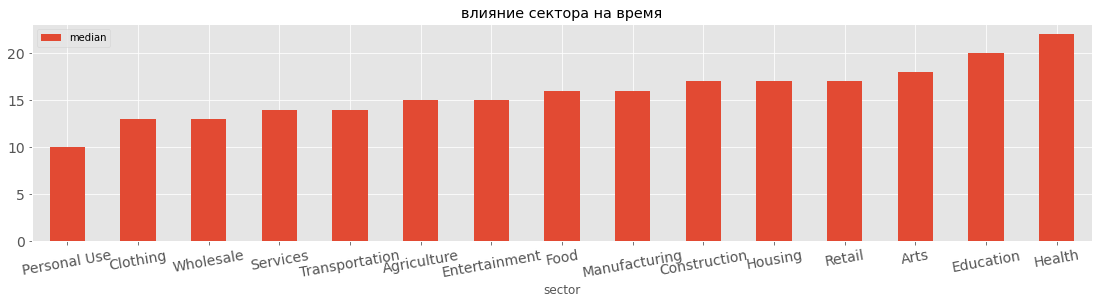

In [378]:
df.groupby(['sector'])['fundraising_time_days'].agg(['median']).reset_index().sort_values(by='median').plot(
        x="sector",
        y="median",
        kind="bar",
        rot=10,
        fontsize=14,
        figsize=(19,4),
    title='влияние сектора на время'
)

<AxesSubplot:title={'center':'суммы инвестирования по секторам'}, xlabel='sector'>

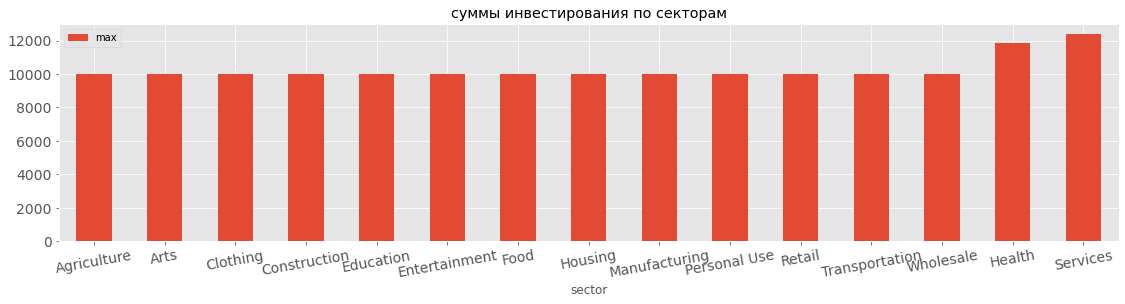

In [379]:
df.groupby(['sector'])['funded_amount'].agg(['max']).reset_index().sort_values(by='max').plot(
        x="sector",
        y="max",
        kind="bar",
        rot=10,
        fontsize=14,
        figsize=(19,4),
    title='суммы инвестирования по секторам'
)

Вывод: из графика видно, что самый быстрой процесс выдачи средв в секторах: Personal Use, clothing. Самый долгий для Health. Самые большие суммы займов в секторе: Servis, Health, самые маленькие: Agriculture, Arts

Влияние вида деятельности на скорость сбора средств.

<AxesSubplot:title={'center':'влияние вида деятельности кредита на время'}, xlabel='activity'>

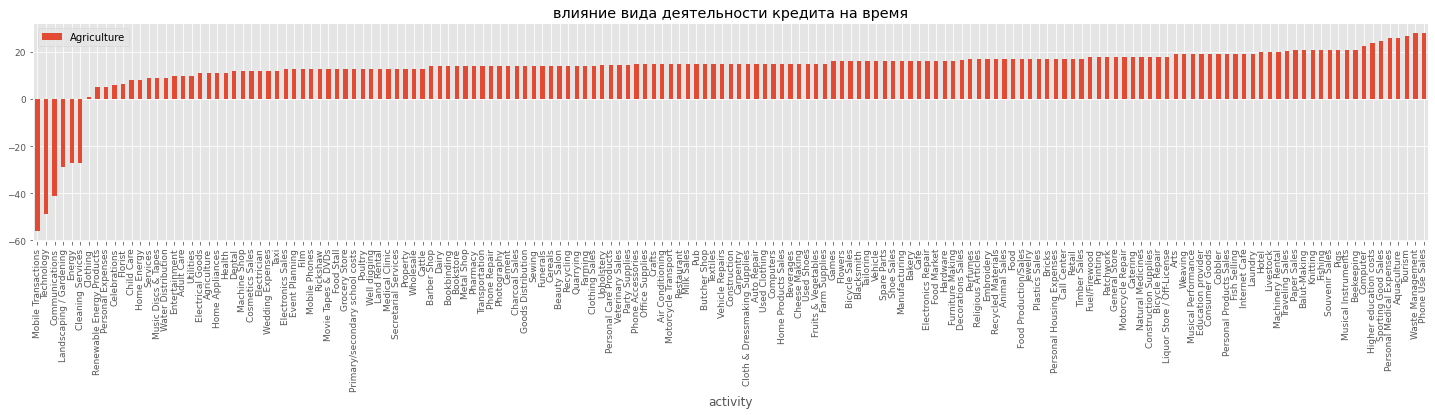

In [380]:
df.groupby(['activity'])['fundraising_time_days'].agg(['median']).reset_index().sort_values(by='median').plot(
        x="activity",
        y="median",
        kind="bar",
        label=txt_sector,
        rot=90,
        fontsize=9,
        figsize=(25,4)
    , title='влияние вида деятельности кредита на время'
)

Вывод: из данных видно, что заемщикам занимающимся Technology, Mobile Transactions, Landscaping / Gardening,  Energy, Communications, Cleaning Services, деятельность займы дают быстрее, а чаще еще до сбора средств.

#### Влияние партнера на выдачу средств

Так как партнеров много, было решено взять 10-самых активных и 10-ку самых менее активных и сравнить как влияет активность парнера на срок выдачи займа. Стоит отметить есть один парнер лидер с 10-ти кратным отрывом и в последнюю 10-ку входят парнеры, которые участвовали единожды.

In [381]:
df.groupby(['partner_id'])['id'].agg(['count']).reset_index().sort_values(by='count', ascending=False).head(10)

,partner_id,count
63,145.0,104502
156,311.0,15776
95,199.0,14927
49,125.0,14396
69,156.0,13647
50,126.0,12714
120,247.0,12208
58,138.0,11904
55,133.0,10398
85,177.0,10179


In [382]:
df.groupby(['partner_id'])['id'].agg(['count']).reset_index().sort_values(by='count', ascending=False).tail(10)

,partner_id,count
163,327.0,1
263,527.0,1
261,504.0,1
139,286.0,1
39,113.0,1
195,383.0,1
173,348.0,1
130,268.0,1
76,165.0,1
169,341.0,1


In [383]:
partner_max = df.groupby(['partner_id'])['id']\
                    .agg(['count'])\
                    .reset_index()\
                    .sort_values(by='count', ascending=False)\
                    ['partner_id'].tolist()[:10]

partner_min = df.groupby(['partner_id'])['id']\
                    .agg(['count'])\
                    .reset_index()\
                    .sort_values(by='count', ascending=False)\
                    ['partner_id'].tolist()[-10:]
partner_all = partner_max + partner_min

<AxesSubplot:title={'center':'влияние топ/антитоп кредитор на время выдачи займа'}, xlabel='partner_id'>

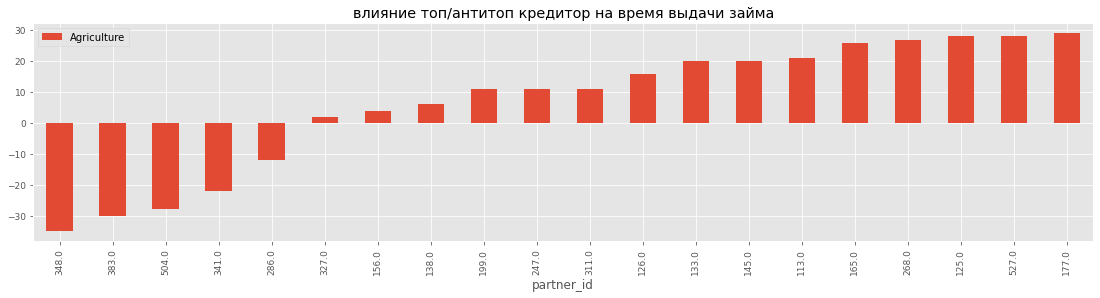

In [384]:
df[df['partner_id'].isin(partner_all)].groupby(['partner_id'])['fundraising_time_days'].agg(['median']).reset_index().sort_values(by='median').plot(
        x="partner_id",
        y="median",
        kind="bar",
        label=txt_sector,
        rot=90,
        fontsize=9,
        figsize=(19,4),
        title='влияние топ/антитоп кредитор на время выдачи займа'
)

<AxesSubplot:title={'center':'влияние top кредитор на время выдачи займа'}, xlabel='partner_id'>

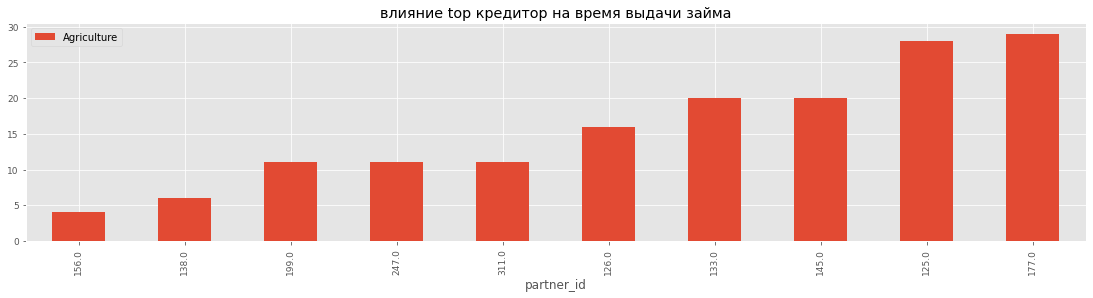

In [385]:
df[df['partner_id'].isin(partner_max)].groupby(['partner_id'])['fundraising_time_days'].agg(['median']).reset_index().sort_values(by='median').plot(
        x="partner_id",
        y="median",
        kind="bar",
        label=txt_sector,
        rot=90,
        fontsize=9,
        figsize=(19,4),
    title='влияние top кредитор на время выдачи займа'
)

<AxesSubplot:title={'center':'влияние antitop кредитор на время выдачи займа'}, xlabel='partner_id'>

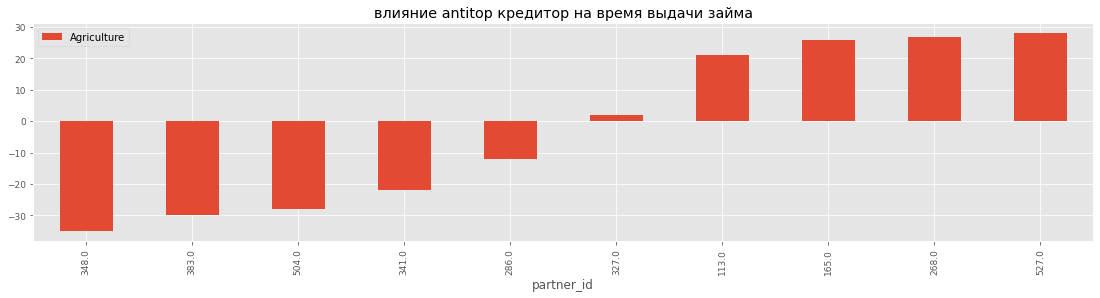

In [386]:
df[df['partner_id'].isin(partner_min)].groupby(['partner_id'])['fundraising_time_days'].agg(['median']).reset_index().sort_values(by='median').plot(
        x="partner_id",
        y="median",
        kind="bar",
        label=txt_sector,
        rot=90,
        fontsize=9,
        figsize=(19,4),
    title='влияние antitop кредитор на время выдачи займа'
)

Вывод: из полученных данных видно, что есть зависимость, заемщики с меньшей активностью выдают средства еще до сбора средств. Активные заемщики чтото знают:))) и выдают их уже в момент или после сбора средств.

Влияние страны на выдачу средств

<AxesSubplot:title={'center':'влияние страны на время выдачи займа'}, xlabel='country'>

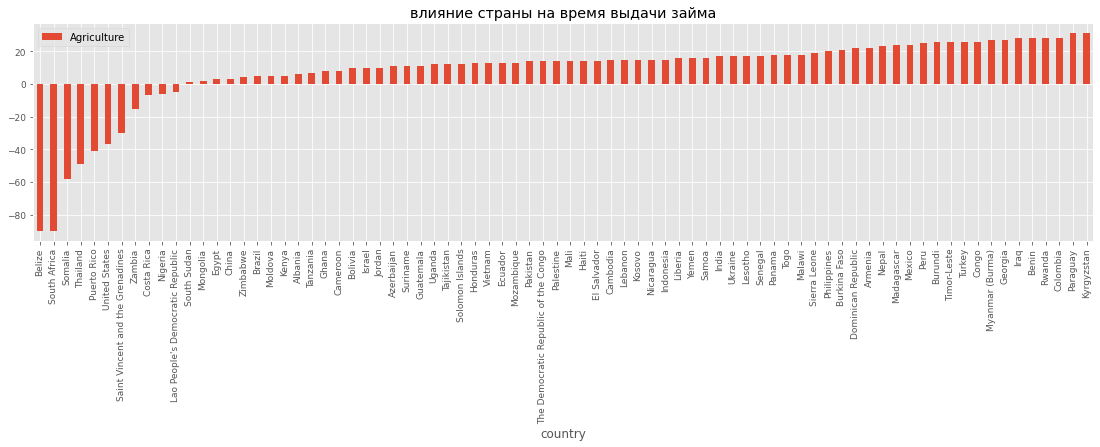

In [387]:
df.groupby(['country'])['fundraising_time_days'].agg(['median']).reset_index().sort_values(by='median').plot(
        x="country",
        y="median",
        kind="bar",
        label=txt_sector,
        rot=90,
        fontsize=9,
        figsize=(19,4),
    title='влияние страны на время выдачи займа'
)

<AxesSubplot:title={'center':'влияние группы страны на время выдачи займа'}, xlabel='group_country'>

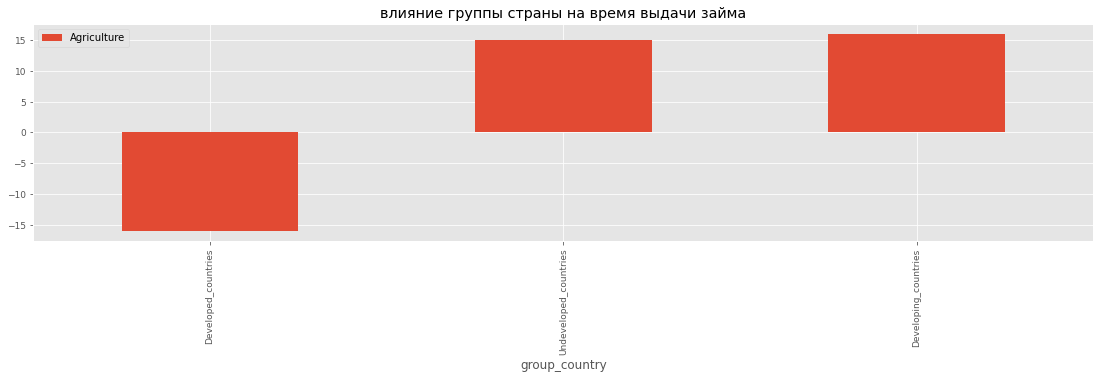

In [388]:
df.groupby(['group_country'])['fundraising_time_days'].agg(['median']).reset_index().sort_values(by='median').plot(
        x="group_country",
        y="median",
        kind="bar",
        label=txt_sector,
        rot=90,
        fontsize=9,
        figsize=(19,4),
    title='влияние группы страны на время выдачи займа'
)

Вывод: для удобства рассмотрения, страны были рассмотрены по группам развитости. Получилось следующеее, что парнеры чаще выдают деньги еще до сбора средств заемщикам из развитых стран. Дольше(незначительно) средства получают заемщики из не развитых стран.

#### Основные выводы:

- займы свыше 10тыс выдают быстрее, чем другие займы.
- самый быстрой процесс выдачи средв в секторах: Personal Use, clothing. 
- Самый долгий для Health. Самые большие суммы займов в секторе: Servis, Health, самые маленькие: Agriculture, Arts
- Для Technology, Mobile Transactions, Landscaping / Gardening,  Energy, Communications, Cleaning Services,  дают средства быстрее (еще до завершения сбора средств), чем для других отраслей
- Заемщики с малой активностью дают займы еще до сбора средств, чем активные заемщики
- Сбор средств для развитых стран быстрее, чем для других

#### Проведите статистический тест, чтобы подтвердить ваши выводы

Сформулируем две гипотезы:
- H0: займы до 10 тыс не выдаются дольше, в отличии от других сумм займов
- H1: займы до 10 тыс выдаются дольше, в отличии от других сумм займов

In [389]:
df_funded_amount_0 = df[(df['funded_amount'] < 10000)]['fundraising_time_days']
df_funded_amount_1 = df[ (df['funded_amount'] >= 10000)]['fundraising_time_days']

In [390]:
len(df_funded_amount_0)

522946

In [391]:
len(df_funded_amount_1)

811

<AxesSubplot:>

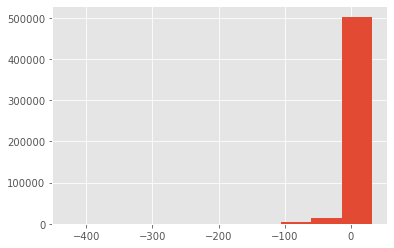

In [394]:
df_funded_amount_0.hist()

<AxesSubplot:>

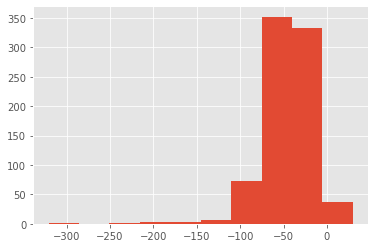

In [395]:
df_funded_amount_1.hist()

Так как данные распределены не нормально, решено взять непараметрический тест Уилкоксона-Манна-Уитни, так как он более устойчев к выбросам.

In [396]:
alpha = .05 # пороговое значение возьмем за 5%

results = st.ttest_ind(
    df_funded_amount_0,
    df_funded_amount_1,
    equal_var = False
)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 6.155531568405199e-252
Отвергаем нулевую гипотезу


In [397]:
from scipy.stats import mannwhitneyu

alpha = .05
results = mannwhitneyu(
    df_funded_amount_0,
    df_funded_amount_1
)
print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    )

p-значение:  0.0
Отвергаем нулевую гипотезу: разница статистически значима


Выводы: 
- Удалось подтвердить статистически значимую разницу в сроке выдачи средств: срок выдачи средств для заявок меньше 10 000 долларов и для заявок от 10 000 долларов различается,но не удалось подтвердить что займы выдаются дольше - был проведен двусторонний тест, т.е. видим только различия в сроке, но не видим, в какую строну эти различия.

Сформулируем две гипотезы:
* H0: нет различия в скорости выдачи средств для секторов Personal Use, Clothing, Health, в отличии от других секторов
* H1: есть различия в скорости выдачи средств для секторов Personal Use, Clothing, Health, в отличии от других секторов

In [398]:
df_sector_0 = df[df['sector'].isin(['Personal Use', 'Clothing', 'Health'])]['fundraising_time_days']
df_sector_1 = df[~df['sector'].isin(['Personal Use', 'Clothing', 'Health'])]['fundraising_time_days']

sector: Personal Use, lenght: #1 30489 #2 493268
test: mannwhitneyu
p-значение:  0.0
Отвергаем нулевую гипотезу: разница статистически значима

----------
sector: Clothing, lenght: #1 24254 #2 499503
test: mannwhitneyu
p-значение:  2.945443460596051e-178
Отвергаем нулевую гипотезу: разница статистически значима

----------
sector: Health, lenght: #1 6440 #2 517317
test: mannwhitneyu
p-значение:  4.0980204085035514e-112
Отвергаем нулевую гипотезу: разница статистически значима

----------


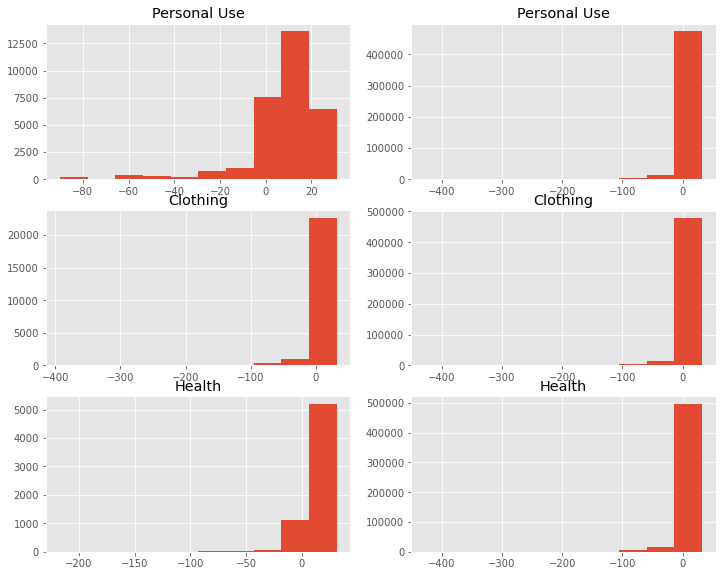

In [399]:
sectors = ['Personal Use', 'Clothing', 'Health']
i = 0
fig = plt.figure(figsize=(12, 20))
for sector in range(len(sectors)):
    t1 = df[df['sector'].isin([sectors[sector]])]['fundraising_time_days']
    t2 = df[~df['sector'].isin([sectors[sector]])]['fundraising_time_days']
    print(f'sector: {sectors[sector]}, lenght: #1 {len(t1)} #2 {len(t2)}')
    pylab.subplot(len(sectors) * 2, 2, sector + i + 1)
    pylab.hist(t1)
    pylab.title(sectors[sector])
    pylab.subplot(len(sectors) * 2, 2, sector + i + 2)
    pylab.hist(t2)
    pylab.title(sectors[sector])
    i += 1
    print(f'test: mannwhitneyu')
    results = mannwhitneyu(t1,t2)
    print('p-значение: ', results.pvalue)

    if results.pvalue < alpha:
        print('Отвергаем нулевую гипотезу: разница статистически значима')
    else:
        print(
            'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
        )
    print()
    print('-' * 10)
    

Вывод: есть различия в скорости выдачи средств для секторов Personal Use, Clothing, Health, в отличии от других секторов


Сформулируем две гипотезы:
* H0: нет различия в областях Technology, Mobile Transactions, Landscaping / Gardening,  Energy, Communications, Cleaning Services и скорости выдачи им заемных средств
* H1: есть различия в областях Technology, Mobile Transactions, Landscaping / Gardening,  Energy, Communications, Cleaning Services и скорости выдачи им заемных средств

sector: Technology, lenght: #1 66 #2 523691
test: mannwhitneyu
p-значение:  6.572884256337856e-39
Отвергаем нулевую гипотезу: разница статистически значима

----------
sector: Mobile Transactions, lenght: #1 161 #2 523596
test: mannwhitneyu
p-значение:  8.649426961127028e-77
Отвергаем нулевую гипотезу: разница статистически значима

----------
sector: Landscaping / Gardening, lenght: #1 26 #2 523731
test: mannwhitneyu
p-значение:  4.106050366012011e-10
Отвергаем нулевую гипотезу: разница статистически значима

----------
sector: Energy, lenght: #1 175 #2 523582
test: mannwhitneyu
p-значение:  4.662653533627341e-102
Отвергаем нулевую гипотезу: разница статистически значима

----------
sector: Communications, lenght: #1 53 #2 523704
test: mannwhitneyu
p-значение:  2.576705616337644e-25
Отвергаем нулевую гипотезу: разница статистически значима

----------
sector: Cleaning Services, lenght: #1 87 #2 523670
test: mannwhitneyu
p-значение:  1.3834983789629337e-27
Отвергаем нулевую гипотезу: р

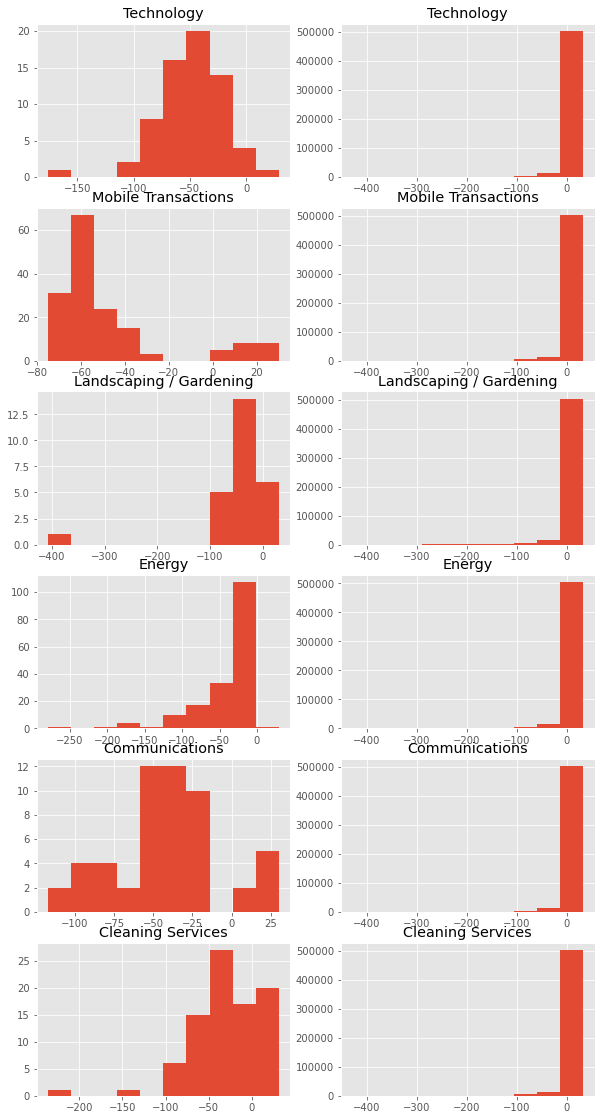

In [410]:
activity = ['Technology', 'Mobile Transactions', 'Landscaping / Gardening',  'Energy', 'Communications', 'Cleaning Services']
i = 0
fig = plt.figure(figsize=(10, 40))
for sector in range(len(activity)):
    
    t1 = df[df['activity'].isin([activity[sector]])]['fundraising_time_days']
    t2 = df[~df['activity'].isin([activity[sector]])]['fundraising_time_days']
    print(f'sector: {activity[sector]}, lenght: #1 {len(t1)} #2 {len(t2)}')
    pylab.subplot(len(activity) * 2, 2, sector + i + 1)
    pylab.hist(t1)
    pylab.title(activity[sector])
    pylab.subplot(len(activity) * 2, 2, sector + i + 2)
    pylab.hist(t2)
    pylab.title(activity[sector])
    i += 1
    print(f'test: mannwhitneyu')
    results = mannwhitneyu(t1,t2)
    print('p-значение: ', results.pvalue)

    if results.pvalue < alpha:
        print('Отвергаем нулевую гипотезу: разница статистически значима')
    else:
        print(
            'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
        )
    print()
    print('-' * 10)

Вывод: есть различия в областях Technology, Mobile Transactions, Landscaping / Gardening,  Energy, Communications, Cleaning Services и скорости выдачи им заемных средств


Сформулируем две гипотезы:
* H0: нет различия в новых/ страых кредиторах и скорости выдачи мим заемных средств
* H1: есть различия в новых/ страых кредиторах и скорости выдачи мим заемных средств

{'whiskers': [<matplotlib.lines.Line2D at 0x7fa7027302b0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa7028ec8b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fa702730910>],
 'medians': [<matplotlib.lines.Line2D at 0x7fa7028ec820>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fa6f8a5f160>],
 'means': []}

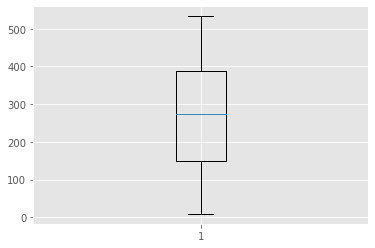

In [430]:
plt.boxplot(df.groupby(['partner_id'])['id']\
                    .agg(['count'])\
                    .reset_index()\
                    .sort_values(by='count', ascending=False)\
                    ['partner_id'])

In [460]:
df.groupby(['partner_id'])['id']\
                    .agg(['count'])\
                    .reset_index()\
                    .sort_values(by='count', ascending=False)\
                    ['partner_id'].describe()

count    266.000000
mean     269.417293
std      135.441482
min        9.000000
25%      150.250000
50%      274.000000
75%      387.500000
max      533.000000
Name: partner_id, dtype: float64

Было решено в группу антитоп отнести инвесторов с активностью < 150.

In [443]:
df_par = df.groupby(['partner_id'])['id'].agg(['count']).reset_index().sort_values(by='count', ascending=False)
par_list = df_par[df_par['count'] < 150]['partner_id'].tolist()

In [444]:
df_partner_0 = df[(df['partner_id'].isin(par_list))]['fundraising_time_days']
df_partner_1 = df[ (~df['partner_id'].isin(par_list))]['fundraising_time_days']

<AxesSubplot:>

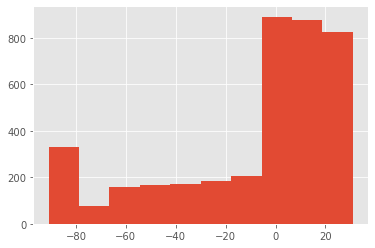

In [445]:
df_partner_0.hist()

<AxesSubplot:>

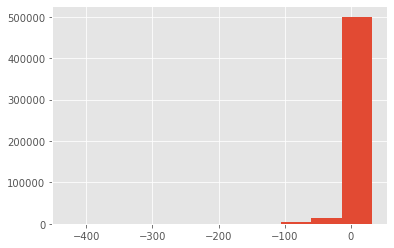

In [446]:
df_partner_1.hist()

In [447]:
alpha = .05 # пороговое значение возьмем за 5%

results = st.ttest_ind(
    df_partner_0,
    df_partner_1,
    equal_var = False
)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.5299635202094173e-281
Отвергаем нулевую гипотезу


In [448]:
from scipy.stats import mannwhitneyu

stat, p = mannwhitneyu(
    df_partner_0,
    df_partner_1
)
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Statistics=584483179.000, p=0.000
Отвергаем нулевую гипотезу


Вывод: есть различия в новых/ страых кредиторах и скорости выдачи мим заемных средств

Сформулируем две гипотезы:
* H0: нет различия в скорости выдачи средств в развитых странах от других
* H1: есть различия в скорости выдачи средств в развитых странах от других

In [449]:
df_country_0 = df[(df['group_country'] == 'Developed_countries')]['fundraising_time_days']
df_country_1 = df[(df['group_country'] != 'Developed_countries')]['fundraising_time_days']

<AxesSubplot:>

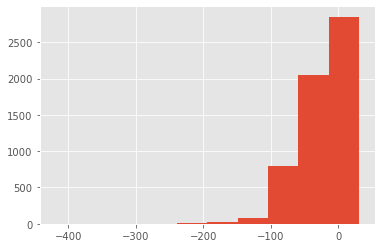

In [450]:
df_country_0.hist()

<AxesSubplot:>

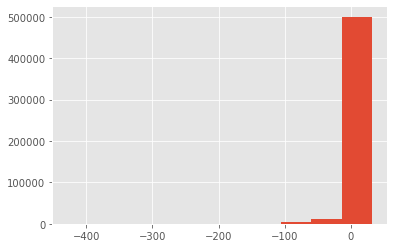

In [451]:
df_country_1.hist()

In [462]:
from scipy.stats import mannwhitneyu

stat, p = mannwhitneyu(
    df_country_0,
    df_country_1
)
print('Statistics=%.3f, p=%.3f' % (stat, p))
 
alpha = 0.05
if p < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Statistics=995118871.000, p=0.000
Отвергаем нулевую гипотезу


Вывод: есть различия в скорости выдачи средств в развитых странах от других

#### Общий выводы по первой части:
- есть различия в скорости выдачи средств для секторов Personal Use, Clothing, Health, в отличии от других секторов
- есть различия в областях Technology, Mobile Transactions, Landscaping / Gardening,  Energy, Communications, Cleaning Services и скорости выдачи им заемных средств
- есть различия в новых/ страых кредиторах и скорости выдачи мим заемных средств
- есть различия в скорости выдачи средств в развитых странах от других


### Анализ заявок и индекса бедности

Анализ заявок и индекса бедности:
- Аггрегируйте данные по заявкам в разрезе стран, сохраняя информацию о средних и суммарных показателях (необходимо будет определить для характеристик, какой вид аггрегации к ним подходит)
- Объедините данные индекса бедности по странам с получившимся набором данных Kiva.
- Проанализируйте взаимосвязь между темой заявки (столбец activity или sector) и индексом бедности страны.
- Определите сектора и темы заявок, которые более распространены в странах с более высокими индексами бедности.
- Оцените представленность заявок из бедных стран в наборе кредитных данных Kiva, определите страны, в которых Kiva недопредставлена, на основе частоты выдачи кредитов.


#### Аггрегируйте данные по заявкам в разрезе стран, сохраняя информацию о средних и суммарных показателях (необходимо будет определить для характеристик, какой вид аггрегации к ним подходит)

In [463]:
df.head(1)

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,...,lender_count,tags,borrower_genders,repayment_interval,date,main_country_religion,group_country,fundraising_time,fundraising_time_days,fundraising_time_days_group
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,...,12,NaN,female,irregular,2014-01-01,Muslims,Developing_countries,14 days 22:12:39,14,"(7.0, 16.0]"


In [464]:
df_country = df.groupby(['country', 'sector']).agg(
    {
        'funded_amount': 'sum',
        'loan_amount': 'mean',
        'term_in_months': 'mean',
        'fundraising_time_days': 'mean',
        'lender_count': 'mean'
    })
df_country.head()

funded_amount  loan_amount  term_in_months  \
country sector                                                     
Albania Agriculture        243350.0   866.014235       16.181495   
        Arts                  825.0   825.000000       20.000000   
        Clothing            23300.0   776.666667       17.233333   
        Construction        11600.0   773.333333       15.266667   
        Education           41200.0   824.000000       16.080000   

                      fundraising_time_days  lender_count  
country sector                                             
Albania Agriculture                7.825623     29.295374  
        Arts                      21.000000     32.000000  
        Clothing                   8.400000     28.366667  
        Construction               6.733333     25.266667  
        Education                 10.420000     29.100000

#### Объедините данные индекса бедности по странам с получившимся набором данных Kiva.

In [465]:
def mpi_index_(list):
    if list in mpi_index:
        return mpi_index[list]
    return 0

In [466]:
df['mpi_index'] = df['country'].apply(mpi_index_)

#### Проанализируйте взаимосвязь между темой заявки (столбец activity или sector) и индексом бедности страны.

<AxesSubplot:title={'center':'влияние темы заявки на индекс развития страны'}, xlabel='sector'>

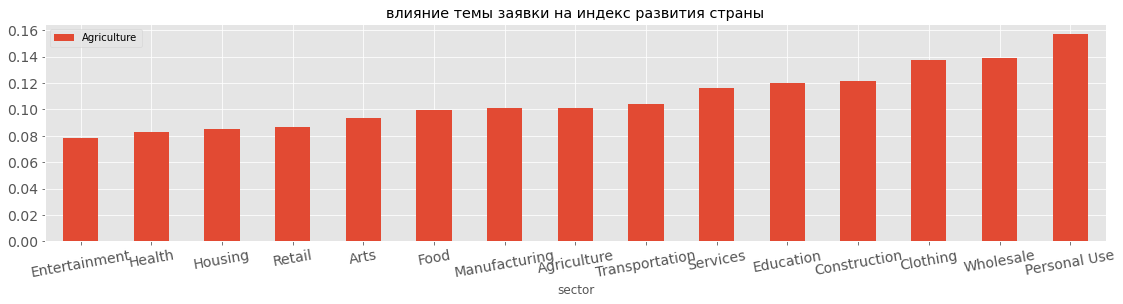

In [467]:
df.groupby(['sector'])['mpi_index'].agg(['mean']).reset_index().sort_values(by='mean').plot(
        x="sector",
        y="mean",
        kind="bar",
        label=txt_sector,
        rot=10,
        fontsize=14,
        figsize=(19,4),
    title='влияние темы заявки на индекс развития страны'
)

Вывод: в более развитых странах популярны такие сектора: Personal Use, Wholesale, Clothing. Менее развитых странах: Housing, Entertainment, Health.
Стоит отметить что:
- в менее развитых странах интересы найти средства для жилья, развлечений и здоровья
- в развитых странах необходимость в средствах возникает в таких направлениях: оптовая продажа, личное использование и одежда.
- в менее развитых странах ищут средства из-за жизненоважной необходимостью, в отличии от развитых стран.

#### Определите сектора и темы заявок, которые более распространены в странах с более высокими индексами бедности.

In [468]:
df.groupby(['sector']).agg({'mpi_index': 'mean', 'id': 'count'}).reset_index().sort_values(by='mpi_index', ascending=False).sort_values(by='id', ascending=False).head(10)

,sector,mpi_index,id
0,Agriculture,0.100899,139932
6,Food,0.099827,111435
11,Retail,0.086701,103171
12,Services,0.116008,33572
10,Personal Use,0.156944,30489
2,Clothing,0.137285,24254
4,Education,0.119694,20879
8,Housing,0.085186,20800
13,Transportation,0.104340,12374
1,Arts,0.093275,9732


In [469]:
df.groupby(['activity']).agg({'mpi_index': 'mean', 'id': 'count'}).reset_index().sort_values(by='mpi_index', ascending=False).sort_values(by='id', ascending=False).head(10)

,activity,mpi_index,id
72,General Store,0.058378,57281
57,Farming,0.133441,57184
120,Pigs,0.035853,24497
65,Food Production/Sales,0.076745,23243
112,Personal Housing Expenses,0.083035,19929
1,Agriculture,0.088584,19843
78,Home Appliances,0.160335,19180
133,Retail,0.121603,18618
34,Clothing Sales,0.113719,16418
67,Fruits & Vegetables,0.110263,13764


Выводы:
в развитых странах можно выделить:
- сектора: Agriculture, Food, Retail
- темы заявок: Farming, General Store

#### Оцените представленность заявок из бедных стран в наборе кредитных данных Kiva, определите страны, в которых Kiva недопредставлена, на основе частоты выдачи кредитов.

In [476]:
df_old.groupby(['group_country']).agg({'country': 'nunique'}).reset_index().sort_values(by='country', ascending=True).head(10)

,group_country,country
0,Developed_countries,4
2,Undeveloped_countries,33
1,Developing_countries,48


In [471]:
f"Согласно данным 'https://nonews.co/directory/lists/countries/advanced-developing-market' кол-во не развитых стран:{len(Undeveloped_countries)}"

"Согласно данным 'https://nonews.co/directory/lists/countries/advanced-developing-market' кол-во не развитых стран:46"

In [472]:
f"Оцените представленность заявок из бедных стран в наборе кредитных данных Kiva {(33 / 46) * 100}%"

'Оцените представленность заявок из бедных стран в наборе кредитных данных Kiva 71.73913043478261%'

Определим среднюю частоту заявок в не развитых странах:

In [473]:
df[df['group_country'] == 'Undeveloped_countries'].groupby(['country', 'date'])['id'].agg('count').reset_index()['id'].mean()

10.548114630467571

In [475]:
df_old.groupby(['country']).agg({'id': 'count'}).reset_index().sort_values(by='id', ascending=True).head(10)

,country,id
43,Mauritania,1
6,Bhutan,1
18,Cote D'Ivoire,1
0,Afghanistan,2
80,Vanuatu,4
49,Namibia,8
13,Chile,9
61,Saint Vincent and the Grenadines,16
59,Puerto Rico,51
66,Somalia,75


Вывод: на основе данных, при средней выдачи кредитов 11шт/день, kiva недопредставлена в следующих странах: Mauritania, Bhutan, Cote D'Ivoire, Afghanistan, Vanuatu, Namibia, Chile

### Общий вывод по второй части:
- в более развитых странах популярны такие сектора: Personal Use, Wholesale, Clothing.
- в менее развитых странах: Housing, Entertainment, Health. <br>
в развитых странах можно выделить:
- популярные сектора: Agriculture, Food, Retail
- популярные темы заявок: Farming, General Store
- на основе данных, при средней выдачи кредитов 11шт/день, kiva недопредставлена в следующих странах: Mauritania, Bhutan, Cote D'Ivoire, Afghanistan, Vanuatu, Namibia, Chile

## Общий вывод:
- есть различия в скорости выдачи средств для секторов Personal Use, Clothing, Health, в отличии от других секторов
- есть различия в областях Technology, Mobile Transactions, Landscaping / Gardening,  Energy, Communications, Cleaning Services и скорости выдачи им заемных средств
- есть различия в новых/ страых кредиторах и скорости выдачи мим заемных средств
- есть различия в скорости выдачи средств в развитых странах от других
- в более развитых странах популярны такие сектора: Personal Use, Wholesale, Clothing.
- в менее развитых странах: Housing, Entertainment, Health. <br>
в развитых странах можно выделить:
- популярные сектора: Agriculture, Food, Retail
- популярные темы заявок: Farming, General Store
- на основе данных, при средней выдачи кредитов 11шт/день, kiva недопредставлена в следующих странах: Mauritania, Bhutan, Cote D'Ivoire, Afghanistan, Vanuatu, Namibia, Chile


#### Рекомендации на основе исследования:

- в ходе исследования видно что сервис более популярен в развивающихся и не развитых странах, при этом стоит отметить что сервис плохо представлен или не представлен вообще в некоторых не развивающихся странах
- стоит уделить внимание секторам которые популярны в разных группах, т.к. это скорее всего связано с экономическими обстоятельствами, которые и открывают путь заемщику к займу.
- стоит отметить факт, что кредиторы, которые дают средства не первый раз, склонны давать средства уже после их сбора. Нужно проанализировать с чем это связано, какой % не возвратных средств.